In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import calendar
from pprint import pprint
from api_keys import g_key
file2019 = "2019.csv"
file2020 = "2020.csv"

crime_data2019 = pd.read_csv(file2019,low_memory=False)
crime_data2020 = pd.read_csv(file2020,low_memory=False)



In [2]:
#Grab only a few needed columns from main data set for line graphs

crime_data_selection_2019 = crime_data2019[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2019 = crime_data_selection_2019.copy()
crime_data_selection_2019["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2019["Occurred Date"]).month
crime_data_selection_2019["Month Occurred"] = crime_data_selection_2019["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2019 = crime_data_selection_2019[["Highest Offense Description","Month Occurred"]]

crime_data_selection_2020 = crime_data2020[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2020 = crime_data_selection_2020.copy()
crime_data_selection_2020["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2020["Occurred Date"]).month
crime_data_selection_2020["Month Occurred"] = crime_data_selection_2020["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2020 = crime_data_selection_2020[["Highest Offense Description","Month Occurred"]]




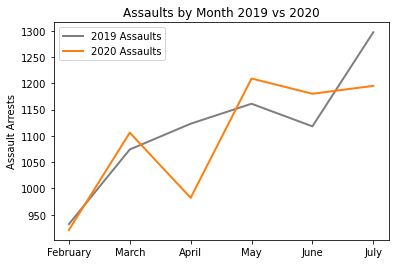

In [3]:
#Assaults by month 2019 vs 2020

assault2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("ASSAULT")]
aslt2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("ASLT")]
allassaultstypesbymonth2019 = pd.merge(assault2019bymonth,aslt2019bymonth, how="outer")
summary_assaults_by_month_2019 = allassaultstypesbymonth2019.groupby("Month Occurred").count()


assault2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("ASSAULT")]
aslt2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("ASLT")]
allassaultstypesbymonth2020 = pd.merge(assault2020bymonth,aslt2020bymonth, how="outer")
summary_assaults_by_month_2020 = allassaultstypesbymonth2020.groupby("Month Occurred").count()


month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_assaults_by_month_2019 = summary_assaults_by_month_2019.reindex(month_order, axis=0)
summary_assaults_by_month_2020 = summary_assaults_by_month_2020.reindex(month_order, axis=0)

plt.plot(summary_assaults_by_month_2019,label='2019 Assaults', linewidth=2,color='tab:gray')
plt.plot(summary_assaults_by_month_2020,label='2020 Assaults', linewidth=2,color='tab:orange')
plt.legend()
plt.ylabel("Assault Arrests")
plt.title("Assaults by Month 2019 vs 2020")
plt.savefig('assaults.line.png')
plt.show()


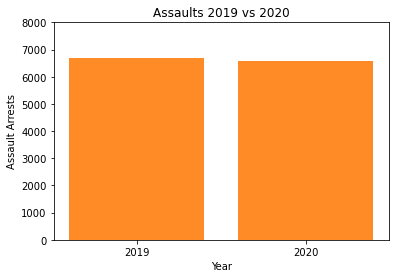

In [4]:
#Assaults bar graph 2019 vs 2020
assaults2019 = crime_data_selection_2019[crime_data2019['Highest Offense Description'].str.contains("ASSAULT")]
aslt2019 = crime_data_selection_2019[crime_data2019['Highest Offense Description'].str.contains("ASLT")]
allassaults2019 = pd.merge(assaults2019,aslt2019, how="outer")
assaults2020 = crime_data_selection_2020[crime_data2020['Highest Offense Description'].str.contains("ASSAULT")]
aslt2020 = crime_data_selection_2020[crime_data2020['Highest Offense Description'].str.contains("ASLT")]
allassaults2020 = pd.merge(assaults2020,aslt2020, how="outer")

assaults_count2019 = allassaults2019["Address"].count()
assaults_count2020 = allassaults2020["Address"].count()
assault_counts =[assaults_count2019,assaults_count2020]
x_axis = np.arange(len(assault_counts))

plt.bar(x_axis, assault_counts, color='tab:orange', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,8000)
plt.title("Assaults 2019 vs 2020")
plt.xlabel("Year")
plt.ylabel("Assault Arrests")
plt.savefig('assaults.bar.png')
plt.show()


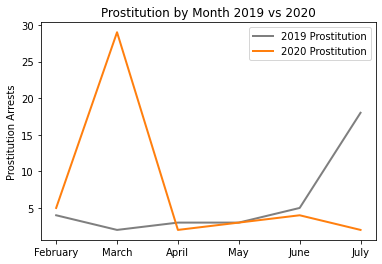

In [5]:
#PROSTITUTION by month

prostitution2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("PROSTITUTION")]
summary_prostitution_by_month_2019 = prostitution2019bymonth.groupby("Month Occurred").count()


prostitution2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("PROSTITUTION")]
summary_prostitution_by_month_2020 = prostitution2020bymonth.groupby("Month Occurred").count()


month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_prostitution_by_month_2019 = summary_prostitution_by_month_2019.reindex(month_order, axis=0)
summary_prostitution_by_month_2020 = summary_prostitution_by_month_2020.reindex(month_order, axis=0)

plt.plot(summary_prostitution_by_month_2019,label='2019 Prostitution', linewidth=2,color='tab:gray')
plt.plot(summary_prostitution_by_month_2020,label='2020 Prostitution', linewidth=2,color='tab:orange')
plt.legend()
plt.ylabel("Prostitution Arrests")
plt.title("Prostitution by Month 2019 vs 2020")
plt.savefig('pro.line.png')
plt.show()


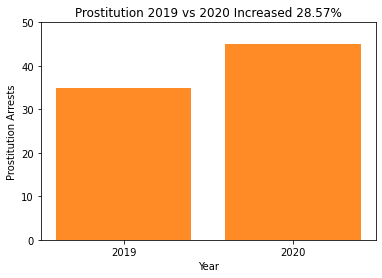

In [6]:
#Prostitution bar graph 2019 vs 2020

prostitution2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("PROSTITUTION")]
prostitution2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("PROSTITUTION")]

prostitution_count2019 = prostitution2019["Address"].count()
prostitution_count2020 = prostitution2020["Address"].count()
counts =[prostitution_count2019,prostitution_count2020]
x_axis = np.arange(len(counts))

proinc = ((prostitution_count2020)-(prostitution_count2019)) / (prostitution_count2019)

# print(f"Prostitution increased by {round(proinc * 100,2)} percent in 2020!")
                                          
plt.bar(x_axis, counts, color='tab:orange', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,50)
plt.title(f"Prostitution 2019 vs 2020 Increased {round(proinc * 100,2)}%")
plt.xlabel("Year")
plt.ylabel("Prostitution Arrests")
plt.savefig('pro.bar.png')
plt.show()


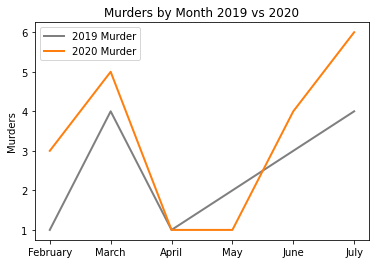

In [7]:
#Murder by month

murder2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("MURDER")]
summary_murder_by_month_2019 = murder2019bymonth.groupby("Month Occurred").count()


murder2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("MURDER")]
summary_murder_by_month_2020 = murder2020bymonth.groupby("Month Occurred").count()


month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_murder_by_month_2019 = summary_murder_by_month_2019.reindex(month_order, axis=0)
summary_murder_by_month_2020 = summary_murder_by_month_2020.reindex(month_order, axis=0)

plt.plot(summary_murder_by_month_2019,label='2019 Murder', linewidth=2,color='tab:gray')
plt.plot(summary_murder_by_month_2020,label='2020 Murder', linewidth=2,color='tab:orange')
plt.legend()
plt.ylabel("Murders")
plt.title("Murders by Month 2019 vs 2020")
plt.savefig('murder.line.png')
plt.show()


Murder increased by 33.33 percent in 2020!


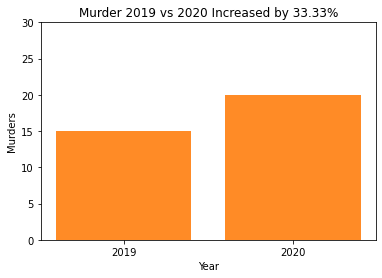

In [8]:
#Murder bar chart 2019 vs 2020

murder2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("MURDER")]

murder2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("MURDER")]

murder_count2019 = murder2019["Address"].count()

murder_count2020 = murder2020["Address"].count()

counts =[murder_count2019,murder_count2020]
x_axis = np.arange(len(counts))


murderincdec = ((murder_count2020)-(murder_count2019)) / (murder_count2019)
print(f"Murder increased by {round(murderincdec * 100,2)} percent in 2020!")

plt.bar(x_axis, counts, color='tab:orange', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,30)
plt.title(f"Murder 2019 vs 2020 Increased by {round(murderincdec * 100,2)}%")
plt.xlabel("Year")
plt.ylabel("Murders")
plt.savefig('murder.bar.png')
plt.show()


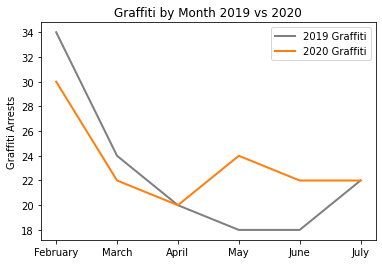

In [9]:
#Graffiti by month

graffiti2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("GRAFFITI")]
summary_graffiti_by_month_2019 = graffiti2019bymonth.groupby("Month Occurred").count()


graffiti2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("GRAFFITI")]
summary_graffiti_by_month_2020 = graffiti2020bymonth.groupby("Month Occurred").count()


month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_graffiti_by_month_2019 = summary_graffiti_by_month_2019.reindex(month_order, axis=0)
summary_graffiti_by_month_2020 = summary_graffiti_by_month_2020.reindex(month_order, axis=0)

plt.plot(summary_graffiti_by_month_2019,label='2019 Graffiti', linewidth=2,color='tab:gray')
plt.plot(summary_graffiti_by_month_2020,label='2020 Graffiti', linewidth=2,color='tab:orange')
plt.legend()
plt.ylabel("Graffiti Arrests")
plt.title("Graffiti by Month 2019 vs 2020")
plt.savefig('graffiti.line.png')
plt.show()


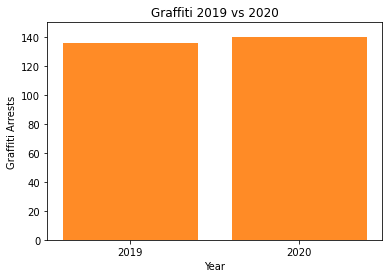

In [10]:
#Graffiti bar graph

graffiti2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("GRAFFITI")]
graffiti2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("GRAFFITI")]

graffiti2019_count = graffiti2019["Address"].count()
graffiti2020_count = graffiti2020["Address"].count()
counts =[graffiti2019_count,graffiti2020_count]
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, color='tab:orange', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,150)
plt.title("Graffiti 2019 vs 2020")
plt.xlabel("Year")
plt.ylabel("Graffiti Arrests")
plt.savefig('graffiti.bar.png')
plt.show()


In [11]:
#Graffiti 2019 data
gmaps.configure(api_key=g_key)

firstloclat2019_graffiti = []
firstloclng2019_graffiti = []

graffiti2019 = graffiti2019.copy()
graffiti2019["Address"] = graffiti2019["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")

for i,graffiti in (graffiti2019.iterrows()):

    try:
        
        address = graffiti2019["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_graffiti_2019 = response.json()
        firstloclat2019_graffiti.append(austin_data_graffiti_2019["results"][0]["geometry"]["location"]["lat"])
        firstloclng2019_graffiti.append(austin_data_graffiti_2019["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2019_graffiti.append("No data.")
        firstloclng2019_graffiti.append("No data.")




In [12]:
#Graffiti 2020 data
gmaps.configure(api_key=g_key)

firstloclat2020_graffiti = []
firstloclng2020_graffiti = []

graffiti2020 = graffiti2020.copy()
graffiti2020["Address"] = graffiti2020["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
for i,graffiti in (graffiti2020.iterrows()):

    try:
        
        address = graffiti2020["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_graffiti_2020 = response.json()
        firstloclat2020_graffiti.append(austin_data_graffiti_2020["results"][0]["geometry"]["location"]["lat"])
        firstloclng2020_graffiti.append(austin_data_graffiti_2020["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2020_graffiti.append("No data.")
        firstloclng2020_graffiti.append("No data.")




In [13]:
#Graffiti 2019 + 2020 Zone Map config

austinlatlong = ()
austinlatlong = (30.2672, -97.7431)
latlong_df2019_graffiti = pd.DataFrame({"Lat": firstloclat2019_graffiti
                              ,"Lng": firstloclng2019_graffiti})        
latlong_df2020_graffiti = pd.DataFrame({"Lat": firstloclat2020_graffiti
                              ,"Lng": firstloclng2020_graffiti})

info_box_content2019_graffiti = """
<dl>
<dt>Graffiti Zone 2019</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""
info_box_content2020_graffiti = """
<dl>
<dt>Graffiti Zone 2020</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""


latlong_df2019_graffiti = latlong_df2019_graffiti.round(2)
latlong_df2019_graffiti = latlong_df2019_graffiti.drop_duplicates()

latlong_df2020_graffiti = latlong_df2020_graffiti.round(2)
latlong_df2020_graffiti = latlong_df2020_graffiti.drop_duplicates()

graffiti_info2019 = [info_box_content2019_graffiti.format(**row) for index, row in latlong_df2019_graffiti.iterrows()]
graffiti_info2020 = [info_box_content2020_graffiti.format(**row) for index, row in latlong_df2020_graffiti.iterrows()]




In [14]:
#Graffiti 2019 Zone map
print(len(latlong_df2019_graffiti))
fig2019_graffiti = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer_graffiti_2019 = gmaps.marker_layer(latlong_df2019_graffiti,info_box_content=graffiti_info2019)
fig2019_graffiti.add_layer(marker_layer_graffiti_2019)
fig2019_graffiti


79


Figure(layout=FigureLayout(height='420px'))

In [15]:
#Graffiti 2020 Zone map
print(len(latlong_df2020_graffiti))
fig2020_graffiti = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer_graffiti_2020 = gmaps.marker_layer(latlong_df2020_graffiti,info_box_content=graffiti_info2020)
fig2020_graffiti.add_layer(marker_layer_graffiti_2020)
fig2020_graffiti

88


Figure(layout=FigureLayout(height='420px'))

In [16]:
#Prostitution 2019 data
gmaps.configure(api_key=g_key)

firstloclat2019_prostitution = []
firstloclng2019_prostitution = []

prostitution2019 = prostitution2019.copy()
prostitution2019["Address"] = prostitution2019["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(prostitution2019))
for i,prostitution in (prostitution2019.iterrows()):

    try:
        
        address = prostitution2019["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_prostitution_2019 = response.json()
        firstloclat2019_prostitution.append(austin_data_prostitution_2019["results"][0]["geometry"]["location"]["lat"])
        firstloclng2019_prostitution.append(austin_data_prostitution_2019["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2019_prostitution.append("No data.")
        firstloclng2019_prostitution.append("No data.")




35


In [17]:
#Prostitution 2020 data
gmaps.configure(api_key=g_key)

firstloclat2020_prostitution = []
firstloclng2020_prostitution = []

prostitution2020 = prostitution2020.copy()
prostitution2020["Address"] = prostitution2020["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(prostitution2020))
for i,prostitution in (prostitution2020.iterrows()):

    try:
        
        address = prostitution2020["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_prostitution_2020 = response.json()
        firstloclat2020_prostitution.append(austin_data_prostitution_2020["results"][0]["geometry"]["location"]["lat"])
        firstloclng2020_prostitution.append(austin_data_prostitution_2020["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2020_prostitution.append("No data.")
        firstloclng2020_prostitution.append("No data.")




45


In [18]:
#Prostitution 2019 + 2020 Zone Map config

austinlatlong = ()
austinlatlong = (30.2672, -97.7431)
latlong_df2019_prostitution = pd.DataFrame({"Lat": firstloclat2019_prostitution
                                           ,"Lng": firstloclng2019_prostitution})        
latlong_df2020_prostitution = pd.DataFrame({"Lat": firstloclat2020_prostitution
                                           ,"Lng": firstloclng2020_prostitution})

info_box_content2019_prostitution = """
<dl>
<dt>Prostitution Zone 2019</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""
info_box_content2020_prostitution = """
<dl>
<dt>Prostitution Zone 2020</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""


latlong_df2019_prostitution = latlong_df2019_prostitution.round(5)
latlong_df2019_prostitution = latlong_df2019_prostitution.drop_duplicates()

latlong_df2020_prostitution = latlong_df2020_prostitution.round(5)
latlong_df2020_prostitution = latlong_df2020_prostitution.drop_duplicates()

prostitution_info2019 = [info_box_content2019_prostitution.format(**row) for index, row in latlong_df2019_prostitution.iterrows()]
prostitution_info2020 = [info_box_content2020_prostitution.format(**row) for index, row in latlong_df2020_prostitution.iterrows()]






In [19]:
#Prostitution 2019 Zones
print(len(latlong_df2019_prostitution))
fig2019_pro = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer = gmaps.marker_layer(latlong_df2019_prostitution,info_box_content=prostitution_info2019)
fig2019_pro.add_layer(marker_layer)
fig2019_pro


31


Figure(layout=FigureLayout(height='420px'))

In [20]:
#Prostitution 2020 Zones
print(len(latlong_df2020_prostitution))
fig2020_pro = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer = gmaps.marker_layer(latlong_df2020_prostitution,info_box_content=prostitution_info2020)
fig2020_pro.add_layer(marker_layer)
fig2020_pro


27


Figure(layout=FigureLayout(height='420px'))

In [21]:
#Murder 2019 data
gmaps.configure(api_key=g_key)

firstloclat2019_murder = []
firstloclng2019_murder = []

murder2019 = murder2019.copy()
murder2019["Address"] = murder2019["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(murder2019))
for i,murder in (murder2019.iterrows()):

    try:
        
        address = murder2019["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_murder_2019 = response.json()
        firstloclat2019_murder.append(austin_data_murder_2019["results"][0]["geometry"]["location"]["lat"])
        firstloclng2019_murder.append(austin_data_murder_2019["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2019_murder.append("No data.")
        firstloclng2019_murder.append("No data.")




15


In [22]:
#Murder 2020 data
gmaps.configure(api_key=g_key)

firstloclat2020_murder = []
firstloclng2020_murder = []

murder2020 = murder2020.copy()
murder2020["Address"] = murder2020["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(murder2020))
for i,murder in (murder2020.iterrows()):

    try:
        
        address = murder2020["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_murder_2020 = response.json()
        firstloclat2020_murder.append(austin_data_murder_2020["results"][0]["geometry"]["location"]["lat"])
        firstloclng2020_murder.append(austin_data_murder_2020["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2020_murder.append("No data.")
        firstloclng2020_murder.append("No data.")




20


In [23]:
#Murder 2019 + 2020 Zone Map config

austinlatlong = ()
austinlatlong = (30.2672, -97.7431)
latlong_df2019_murder = pd.DataFrame({"Lat": firstloclat2019_murder
                                           ,"Lng": firstloclng2019_murder})        
latlong_df2020_murder = pd.DataFrame({"Lat": firstloclat2020_murder
                                           ,"Lng": firstloclng2020_murder})

info_box_content2019 = """
<dl>
<dt>Murder Zone 2019</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""
info_box_content2020 = """
<dl>
<dt>Murder Zone 2020</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""


latlong_df2019_murder = latlong_df2019_murder.drop_duplicates()

latlong_df2020_murder = latlong_df2020_murder.drop_duplicates()


murder_info2019 = [info_box_content2019.format(**row) for index, row in latlong_df2019_murder.iterrows()]
murder_info2020 = [info_box_content2020.format(**row) for index, row in latlong_df2020_murder.iterrows()]






In [24]:
#2019 Murder Zones
print(len(latlong_df2019_murder))
fig2019_murder = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer = gmaps.marker_layer(latlong_df2019_murder,info_box_content=murder_info2019)
fig2019_murder.add_layer(marker_layer)
fig2019_murder


15


Figure(layout=FigureLayout(height='420px'))

In [25]:
#2020 Murder Zones
print(len(latlong_df2020_murder))
fig2020_murder = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer = gmaps.marker_layer(latlong_df2020_murder,info_box_content=murder_info2020)
fig2020_murder.add_layer(marker_layer)
fig2020_murder


20


Figure(layout=FigureLayout(height='420px'))